In [5]:
try:
  import gurobipy as gp
  from gurobipy import GRB
except ImportError:
  print("Installing gurobipy")
  !pip install gurobipy
  import gurobipy as gp
  from gurobipy import GRB

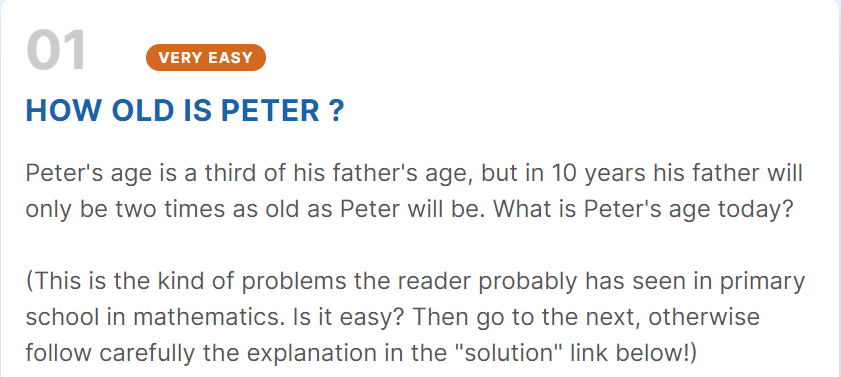

In [8]:
# Defining model object
m = gp.Model('Example 1')

Restricted license - for non-production use only - expires 2025-11-24


In [9]:
# variables are p_curr, f_curr, p_10, f_10
p_curr = m.addVar(vtype=GRB.INTEGER, lb=0, name='Peter\'s current age')
f_curr = m.addVar(vtype=GRB.INTEGER, lb=0, name='Father\'s current age')
p_10 = m.addVar(vtype=GRB.INTEGER, lb=0, name='Peter\'s age after 10yr')
f_10 = m.addVar(vtype=GRB.INTEGER, lb=0, name='Father\'s age after 10yr')

In [10]:
# Constraints
c1 = m.addConstr(p_curr + 10 == p_10)
c2 = m.addConstr(f_curr + 10 == f_10)
c3 = m.addConstr(3 * p_curr == f_curr)
c4 = m.addConstr(2 * p_10 == f_10)

In [11]:
# Objective: maximize total matching score of all assignments
m.setObjective(p_curr, GRB.MAXIMIZE)

In [14]:
# Save model for inspection
m.write('exp1.rlp')

In [15]:
# Run optimization engine
m.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 4 rows, 4 columns and 8 nonzeros
Model fingerprint: 0x9b750b33
Variable types: 0 continuous, 4 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+01]
Presolve removed 4 rows and 4 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 10 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+01, best bound 1.000000000000e+01, gap 0.0000%


In [16]:
m.getVars()

[<gurobi.Var Peter's current age (value 10.0)>,
 <gurobi.Var Father's current age (value 30.0)>,
 <gurobi.Var Peter's age after 10yr (value 20.0)>,
 <gurobi.Var Father's age after 10yr (value 40.0)>]

In [20]:
# Display optimal values of decision variables
print(p_curr, p_curr.x)

<gurobi.Var Peter's current age (value 10.0)> 10.0


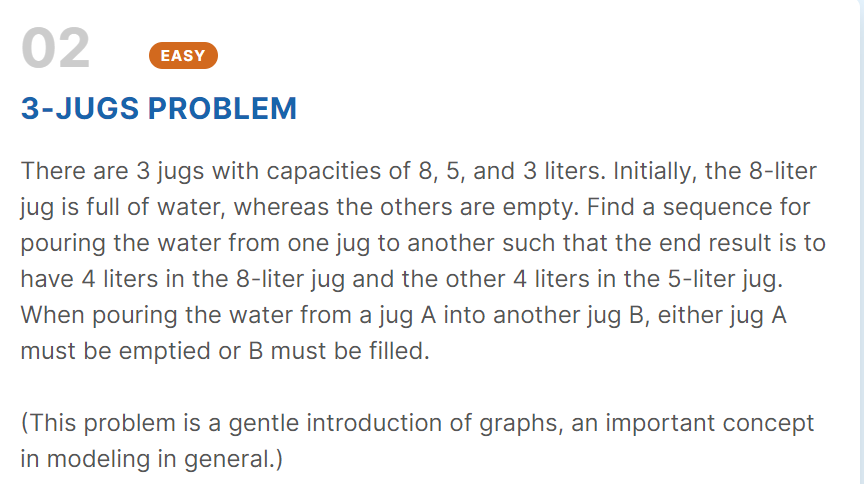

model "3-jugs Problem";
variable \\
